In [3]:
from src.cyc_gbm.distributions import Distribution, initiate_distribution
import numpy as np
from src.cyc_gbm import CycGBM
from matplotlib import pyplot as plt

In [50]:
rng = np.random.default_rng(seed=10)
n = 10000
p = 5
X = np.concatenate([np.ones((1, n)), rng.normal(0, 1, (p - 1, n))]).T
z0 = (
    1.5 * X[:, 1]
    + 2 * X[:, 2]
)
z1 = 1 + 2.2 * X[:, 1]
z = np.stack([z0, z1])
distribution = initiate_distribution(dist="normal")
y = distribution.simulate(z=z, random_state=5)

kappa = 100
eps = 0.1
max_depth = 2
gbm = CycGBM(dist="normal", kappa=kappa, eps=eps, max_depth = max_depth)
gbm.fit(X, y)

z_hat = gbm.predict(X)
loss = gbm.dist.loss(y=y, z=z_hat).sum()
loss_init = gbm.dist.loss(y=y, z=gbm.z0).sum()

print(f"Initial loss: {loss_init}")
print(f"Final loss: {loss}")

/Users/Henning/PycharmProjects/c-gbm/src/cyc_gbm/distributions.py:243: RuntimeWarning: overflow encountered in exp
  return z[1] + 0.5 * np.exp(-2 * z[1]) * (y - z[0]) ** 2
/Users/Henning/PycharmProjects/c-gbm/src/cyc_gbm/distributions.py:249: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-2 * z[1]) * (y - z[0]) ** 2
/Users/Henning/PycharmProjects/c-gbm/src/cyc_gbm/distributions.py:243: RuntimeWarning: overflow encountered in exp
  return z[1] + 0.5 * np.exp(-2 * z[1]) * (y - z[0]) ** 2
/Users/Henning/PycharmProjects/c-gbm/src/cyc_gbm/distributions.py:249: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-2 * z[1]) * (y - z[0]) ** 2
/Users/Henning/PycharmProjects/c-gbm/src/cyc_gbm/distributions.py:243: RuntimeWarning: overflow encountered in exp
  return z[1] + 0.5 * np.exp(-2 * z[1]) * (y - z[0]) ** 2


Initial loss: 57005.5877909133
Final loss: 15848.040230710792


<BarContainer object of 5 artists>

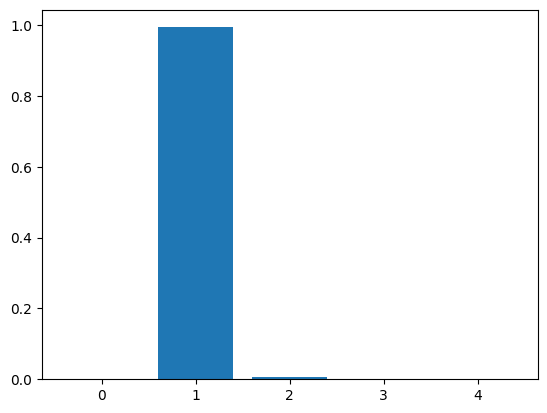

In [53]:
j = 1
feature_importances = np.sum([gbm.trees[j][k].feature_importances() for k in range(kappa)],axis=0)
feature_importances_norm = feature_importances / np.sum(feature_importances)
# Make a bar plot of the normalized feature importanes
plt.bar(np.arange(p), feature_importances_norm)

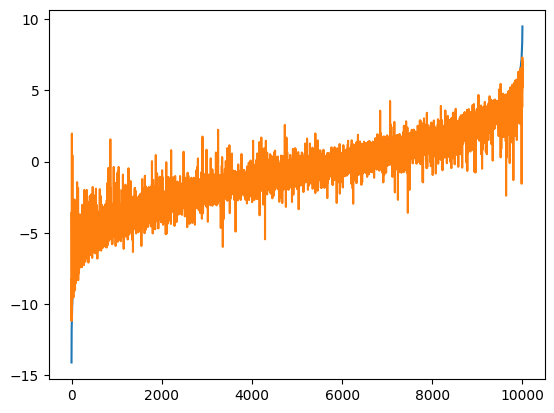

In [43]:
j = 0
sort_order = np.argsort(z[j])
plt.plot(z[j][sort_order], label="True")
plt.plot(z_hat[j][sort_order], label="Predicted")

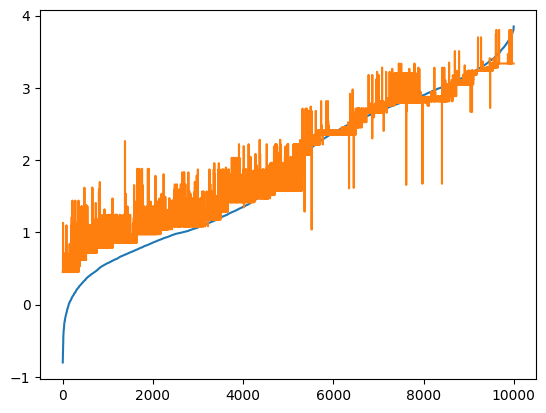

In [41]:
j = 1
sort_order = np.argsort(z[j])
plt.plot(z[j][sort_order], label="True")
plt.plot(z_hat[j][sort_order], label="Predicted")

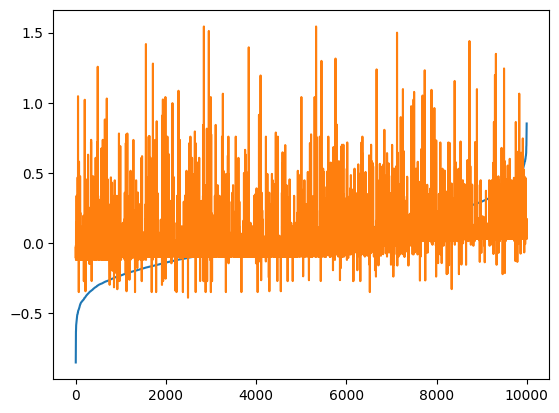

In [42]:
j = 2
sort_order = np.argsort(z[j])
plt.plot(z[j][sort_order], label="True")
plt.plot(z_hat[j][sort_order], label="Predicted")
